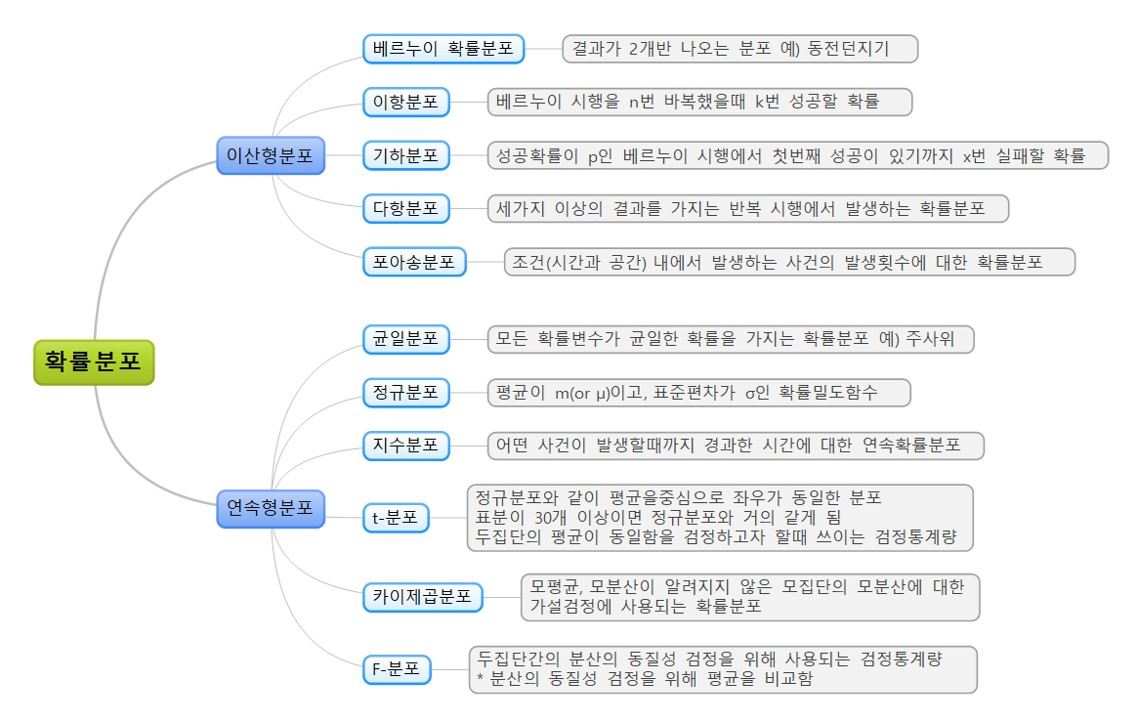

1회 2번 통계분석(FIFA 데이터)

FIFA데이터는 가상의 온라인 축구게임에 등장하는 축구선수의 주요 특징과 신체 정보에 대한 데이터다.



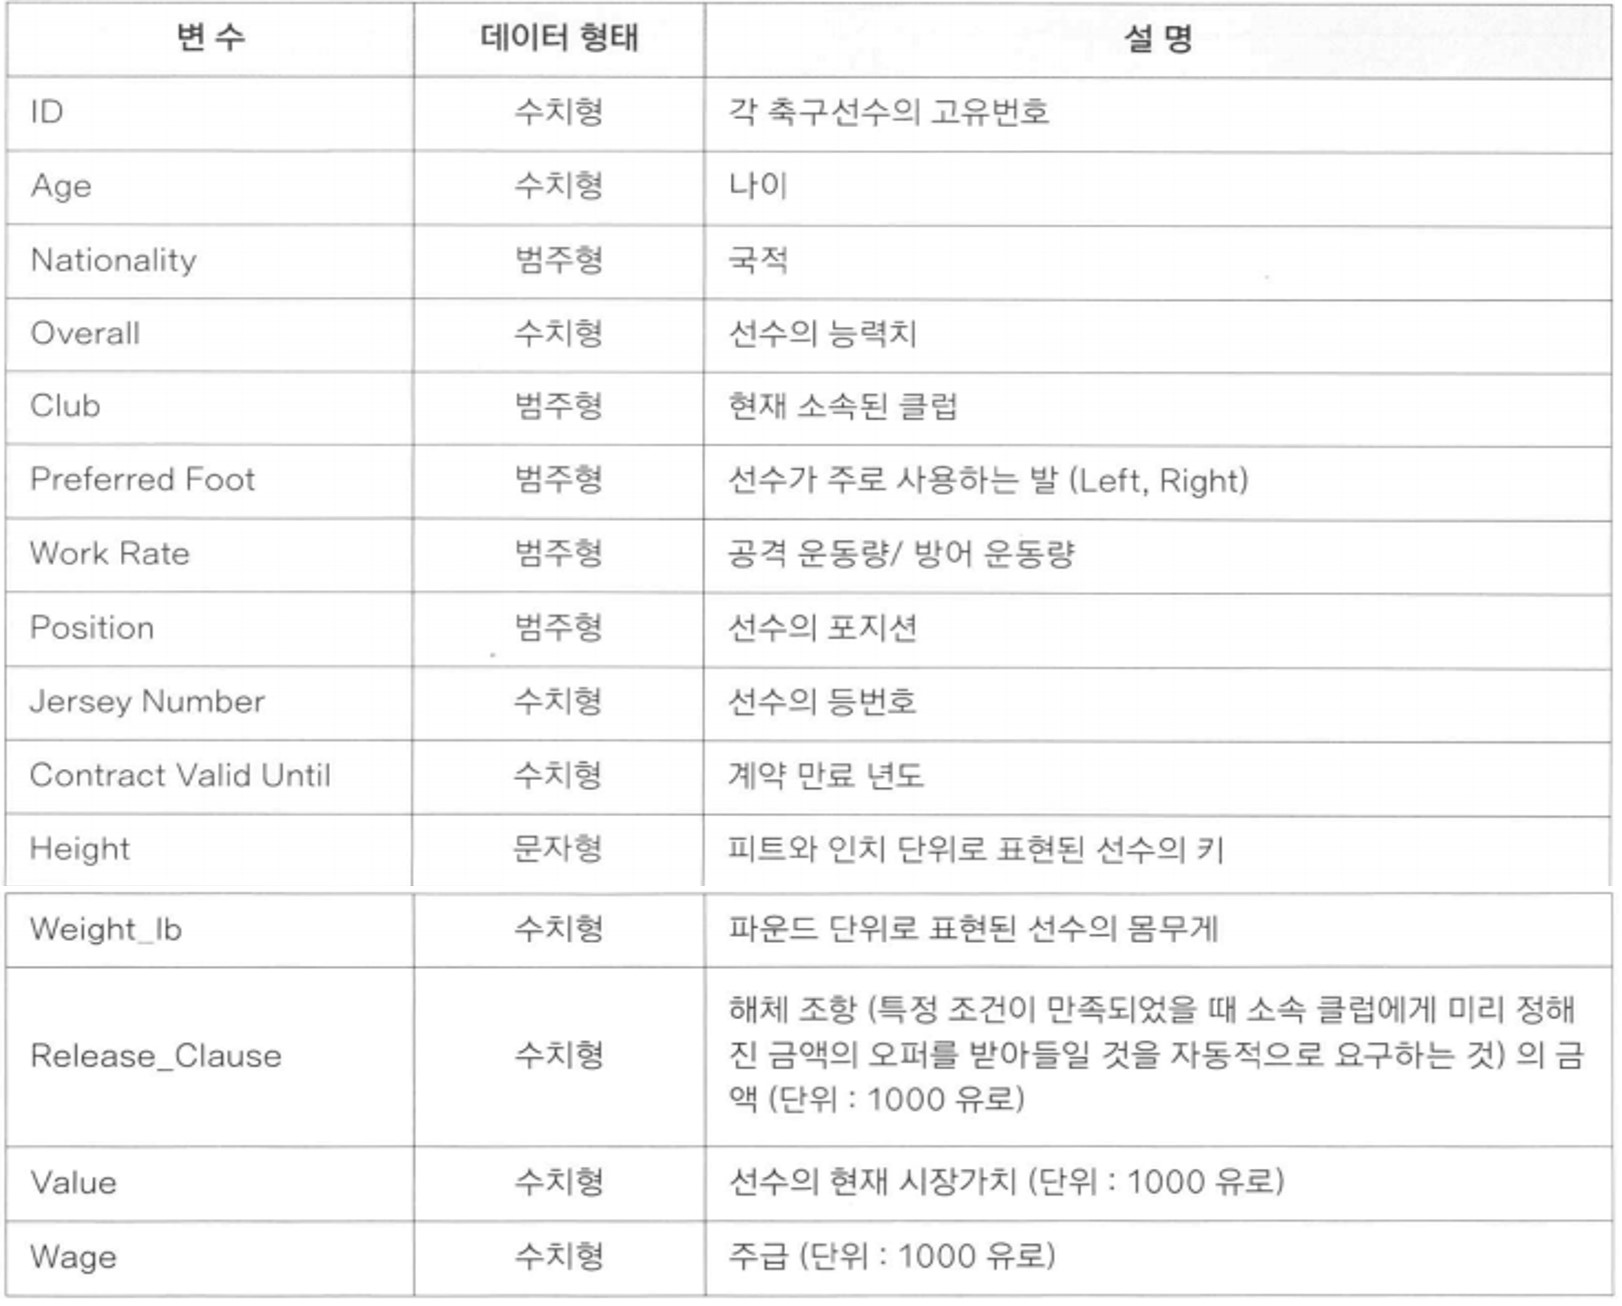

1) FIFA데이터에서 각 선수의 키는 Height변수에 피트와 인치로 입력되어있다. 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오

In [10]:
import pandas as pd
data = pd.read_csv('/FIFA.csv', encoding='cp949')
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [ ]:
data['Height_cm'] = data['Height'].apply(lambda x: int(x.split("'")[0])*30 + int(x.split("'")[1])*2.5)
data[['Height', 'Height_cm']]

,Height,Height_cm
0,5'7,167.5
1,6'2,185.0
2,5'9,172.5
3,6'4,190.0
4,5'11,177.5
...,...,...
16637,5'9,172.5
16638,6'3,187.5
16639,5'8,170.0
16640,5'10,175.0


2) 포지션을 의미하는 Position변수를 아래 표를 참고하여 "Forward", "Midfielder", "Defender", "GoalKeeper"로 재범주화하고, factor형으로 변환하여 Position_Class라는 변수는 생성하고 저장하시오.

In [ ]:
data['Position'].astype('string')
data['Position_Class'] = data['Position'].copy()


rep = ['LS','ST','RS','LW','LF','CF','RF','RW']
rep1 = ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
rep2 = ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
rep3 = ['GK']

for i in range(len(data)):
    for j in range(len(rep)):
        if data['Position_Class'][i] == rep[j]:
            data['Position_Class'][i] = data['Position_Class'][i].replace(data['Position_Class'][i],'Forward')


for i in range(len(data)):
    for j in range(len(rep1)):
        if data['Position_Class'][i] == rep1[j]:
            data['Position_Class'][i] = data['Position_Class'][i].replace(data['Position_Class'][i],'Midfielder')
            

for i in range(len(data)):
    for j in range(len(rep2)):
        if data['Position_Class'][i] == rep2[j]:
            data['Position_Class'][i] = data['Position_Class'][i].replace(data['Position_Class'][i],'Defender')
            

for i in range(len(data)):
    for j in range(len(rep3)):
        if data['Position_Class'][i] == rep3[j]:
            data['Position_Class'][i] = data['Position_Class'][i].replace(data['Position_Class'][i],'GoalKeeper')

In [ ]:
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,Midfielder


In [ ]:
data['Position_Class'].value_counts()

Defender      6763
Midfielder    4935
Forward       3044
GoalKeeper    1900
Name: Position_Class, dtype: int64

3) 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.

In [ ]:
# 귀무가설 : 포지션에 따른 value 차이가 없다
# 대립가설 : 적어도 1개 이상의 포지션은 value 차이가 있다.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Value~Position_Class', data).fit() # ols('종속변수~독립변수',DataFrame).fit()
anova_lm(model) # 분산분석표 반환

,df,sum_sq,mean_sq,F,PR(>F)
Position_Class,3.0,4.081181e+09,1.360394e+09,41.873906,5.988667e-27
Residual,16638.0,5.405330e+11,3.248786e+07,NaN,NaN


분석결과 해석
- p값이 0.05보다 매우 작으므로 귀무가설 기각 (포지션별 value 차이가 있다.)
* 여기서는 귀무가설 기각만 확인이 가능하며 어느 포진션이 차이가 있는지를 알기 위해서는 사후 검정을 해야함


In [ ]:
# 사후검정 (귀무가설이 기각된 내용 확인)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# HSD : Honestly Significant Difference
hsd = pairwise_tukeyhsd(data['Value'], data['Position_Class'], alpha=0.05)
hsd.summary()
#print(hsd)

group1,group2,meandiff,p-adj,lower,upper,reject
Defender,Forward,930.373,0.001,610.7429,1250.0031,True
Defender,GoalKeeper,-507.3848,0.0034,-887.6261,-127.1436,True
Defender,Midfielder,760.8787,0.001,486.7123,1035.045,True
Forward,GoalKeeper,-1437.7579,0.001,-1865.9234,-1009.5923,True
Forward,Midfielder,-169.4944,0.5609,-506.9991,168.0104,False
GoalKeeper,Midfielder,1268.2635,0.001,872.8782,1663.6488,True


분석결과 해석
- Foward - Midfielder 는 p값이 0.05보다 커서 차이가 있다고 볼수 없다.
- 나머지 경우는 p값이 0.05보다 작아서 차이가 있다고 볼수 있다.

** 귀무가설 : 포지션별 (유의미한) 차이가 없다. (reject = True) 

4) Preferred Foot(주로 사용하는 발)과 Position_Class(재범주화된 포지션)변수에 따라 Value(선수의 시장가치)의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

In [ ]:
model2 = ols('Value ~ Position_Class * Preferred_Foot', data).fit()
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
Position_Class,3.0,4.081181e+09,1.360394e+09,41.912369,5.658225e-27
Preferred_Foot,1.0,1.522715e+08,1.522715e+08,4.691332,3.032930e-02
Position_Class:Preferred_Foot,3.0,4.736156e+08,1.578719e+08,4.863874,2.207249e-03
Residual,16634.0,5.399071e+11,3.245805e+07,NaN,NaN


In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     20.72
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           6.04e-28
Time:                        15:27:15   Log-Likelihood:            -1.6753e+05
No. Observations:               16642   AIC:                         3.351e+05
Df Residuals:                   16634   BIC:                         3.351e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                             2010.3299    129.851     15.482      0.000    1755.808    2264.852
Position_Class[T.Forward]                             1713.4347    282.859      6.058      0.000    1159.001    2267.869
Position_Class[T.GoalKeeper]                           574.0484    430.160      1.334      0.182    -269.111    1417.208
Position_Class[T.Midfielder]                          1107.0860    210.197      5.267      0.000     695.077    1519.095
Preferred_Foot[T.Right]                                131.8539    153.526      0.859      0.390    -169.074     432.782
Position_Class[T.Forward]:Preferred_Foot[T.Right]     -960.5177    315.512     -3.044      0.002   -1578.954    -342.081
Position_Class[T.GoalKeeper]:Preferred_Foot[T.Right] -1230.5701    459.088     -2.680      0.007   -2130.431    -330.710
Position_Class[T.Midfielder]:Preferred_Foot[T.Right]  -463.5985    244.037     -1.900      0.057    -941.938      14.741
==============================================================================
Omnibus:                    21047.408   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3972444.308
Skew:                           6.967   Prob(JB):                         0.00
Kurtosis:                      77.395   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5) Age, Overall, Wage, Height_cm, Weight_lb가 Value에 영향을 미치는지 알아보기 위해서 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [ ]:
model3 = ols('Value ~ Wage + Overall + Age + Height_cm', data).fit()
#anova_lm(model3)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.572e+04
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:29:58   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16637   BIC:                         3.092e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8690.8178    588.280    -14.773      0.000   -9843.908   -7537.727
Wage         184.1837      1.128    163.317      0.000     181.973     186.394
Overall      241.3450      4.002     60.310      0.000     233.501     249.189
Age         -202.1603      4.938    -40.936      0.000    -211.840    -192.480
Height_cm     -8.4446      3.082     -2.740      0.006     -14.486      -2.403
==============================================================================
Omnibus:                    17089.038   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525378.426
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     5.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

6) (추가문제) 회귀모델에 대한 잔차 분석을 수행하고 해석하시오.

정규성, 독립성, 등분산성 확인

In [ ]:
# 정규성 확인

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 30)
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from pandas import DataFrame
import urllib.request
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
warnings.filterwarnings("ignore")


predict = model2.predict(data[['Wage','Overall','Age','Height_cm']])
residual = data['Value'] - predict
stats.shapiro(residual)

(0.6421310901641846, 0.0)

?? 결과값이 이상하게 나옴
"ShapiroResult(statistic=0.6421310901641846, pvalue=0.0)"

pvalue가 0으로 나와서 정규분포를 따른다고 볼수 없음
따라서 회귀모형에 적용할수 없는 데이터임 (? 맞는 해석인지 의아함)


---



In [ ]:
print(data['Value'], predict)

0        110500
1         77000
2        118500
3         72000
4        102000
          ...  
16637        60
16638        60
16639        60
16640        60
16641        60
Name: Value, Length: 16642, dtype: int64 0        110377.948488
1         80356.459949
2         60213.327003
3         54096.531320
4         71699.537566
             ...      
16637     -2461.156481
16638     -2587.825221
16639     -1833.564100
16640     -2077.947321
16641     -2117.131992
Length: 16642, dtype: float64


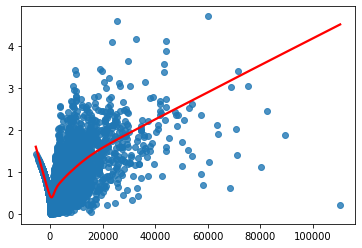

In [ ]:
import seaborn as sns

sr = scipy.stats.zscore(residual)
sns.regplot(predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

In [ ]:
# 등분산성 검정
# (참고) https://blog.naver.com/PostView.nhn?blogId=willie123&logNo=222103777303&parentCategoryNo=&categoryNo=17&viewDate=&isShowPopularPosts=true&from=search

from scipy.stats import levene
levene(data['Value'], predict)

LeveneResult(statistic=61.19864995965284, pvalue=5.311566538106857e-15)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

pvalue가 0.05보다 작으므로 등분산성 미충족

In [ ]:
# 독립성 검정(통계 결과값의 Durbin-Watson 값으로 확인)
# 0~4 값으로 판단
# 2에 까까울수록 잔차항의 자기상관이 없음
# 0에 가까운수록 양의 상관관계가 있고, 4에 가까울수록 음의 상관관계가 있음을 의미
# 0,4에 가까운 경유 회귀식이 부적합함을 의미함
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.572e+04
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:33:21   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16637   BIC:                         3.092e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8690.8178    588.280    -14.773      0.000   -9843.908   -7537.727
Wage         184.1837      1.128    163.317      0.000     181.973     186.394
Overall      241.3450      4.002     60.310      0.000     233.501     249.189
Age         -202.1603      4.938    -40.936      0.000    -211.840    -192.480
Height_cm     -8.4446      3.082     -2.740      0.006     -14.486      -2.403
==============================================================================
Omnibus:                    17089.038   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525378.426
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     5.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""